In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import itertools
import piecewise_regression

In [45]:
pip install piecewise-regression

Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv("data_84.csv")
print(len(data))
print(data.dtypes)

223
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
pct_dusted_ccn                    int64
pct_dusted_rmcl                 float64
biggest_anc                       int64
n_biggest_anc                     int64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                  int64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                   int64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr_hi                          floa

In [3]:
d1 = data[data["class"] == 1]
d0 = data[data["class"] == 0]

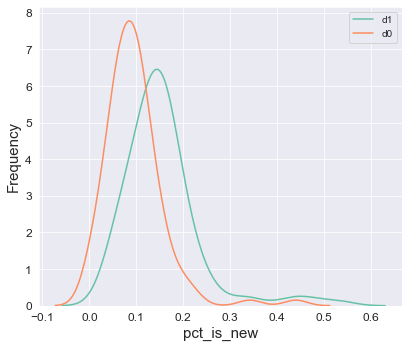

In [4]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x='pct_is_new',label="d1")
sns.kdeplot(data = d0,x='pct_is_new',label="d0")
plt.xlabel('pct_is_new', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

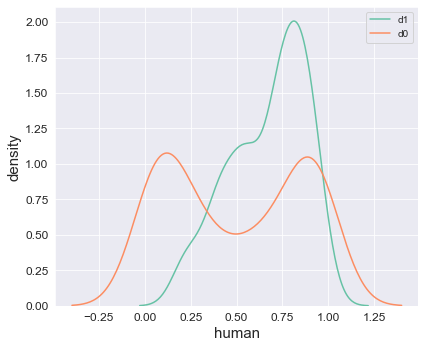

In [13]:
st = "human"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("human.png")

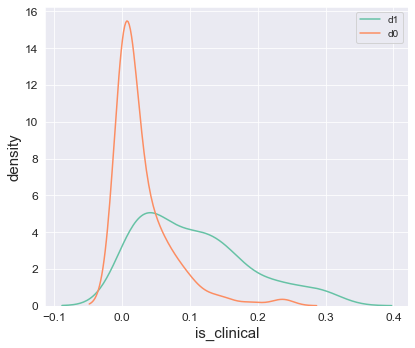

In [14]:
st = "is_clinical"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("isclin.png")

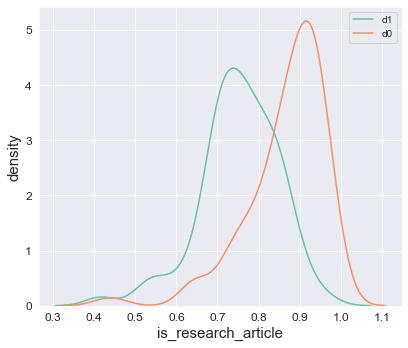

In [17]:
st = "is_research_article"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("is_research.png")

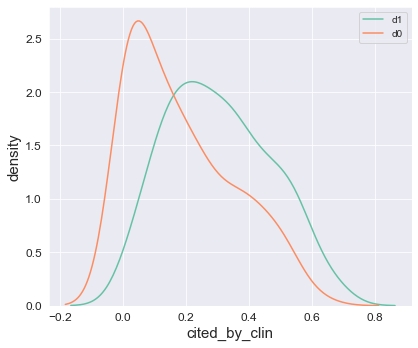

In [18]:
st = "cited_by_clin"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("cited_clin.png")

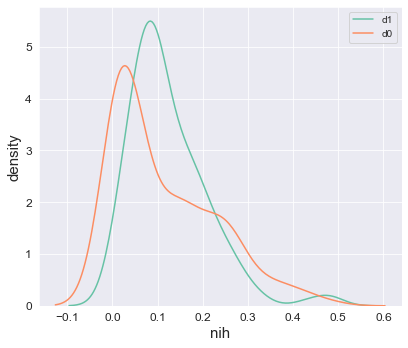

In [19]:
st = "nih"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("nih.png")

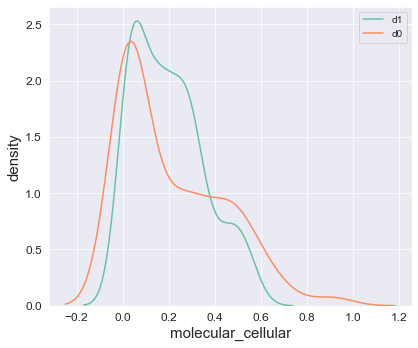

In [32]:
st = "molecular_cellular"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("molcel.png")

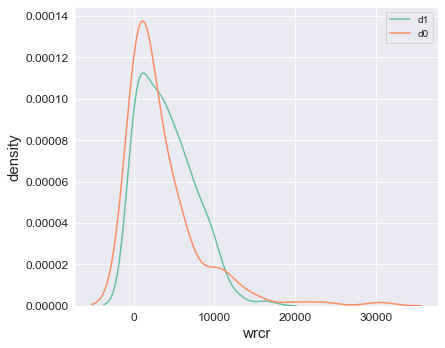

In [21]:
st = "wrcr"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("wrcr.png")

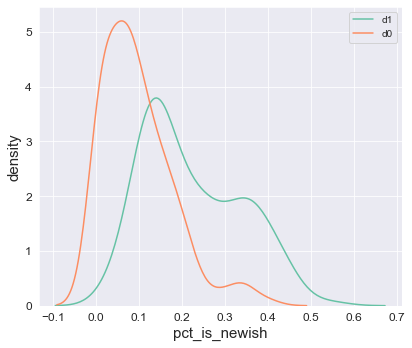

In [22]:
st = "pct_is_newish"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("pct_is_newish.png")

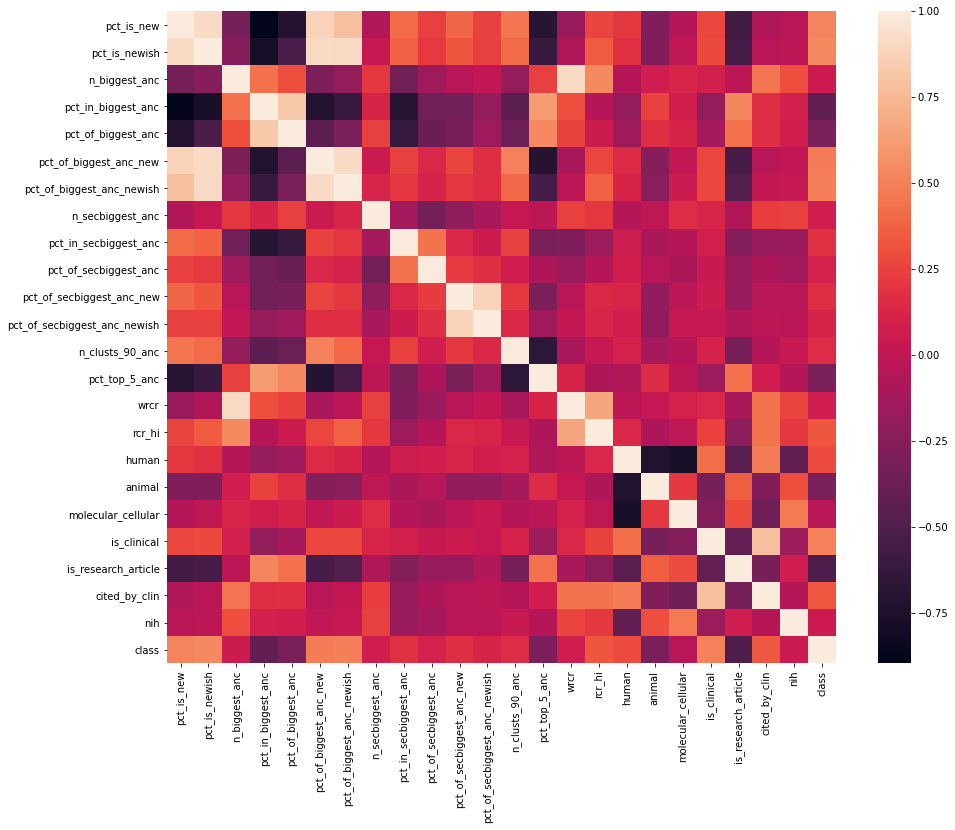

In [5]:
x = data.copy()
x = x.drop(['rcr_mid','rcr_low','pct_dusted_rmcl','pct_dusted_ccn','n','cluster','rage','year','biggest_anc','secbiggest_anc'], axis = 1)
fig = plt.figure(figsize=(15, 12))
sns.heatmap(x.corr())
plt.show()
fig.savefig('cor.png')

[0 1]


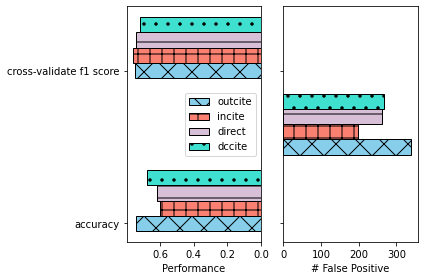

In [4]:
sns.color_palette("gray")
labels = ['accuracy', 'cross-validate f1 score']
outcite = [0.74 , 0.75]
incite = [0.6, 0.76]
direct = [0.62, 0.74]
dccite = [0.68, 0.72]

l = ['FP']
outcite1 = [339]
incite1 = [198]
direct1 = [262]
dccite1 = [268]

#OUR = [0.80, 0.81, 0.79]

x = np.arange(len(labels))  # the label locations
print(x)

xx = np.arange(1)

width = 0.10  # the width of the bars

fig, ax = plt.subplots(ncols=2, sharey=True)


rects1 = ax[0].barh(x + 0.00, outcite, width, label='outcite',edgecolor='black',hatch='x', color = "skyblue",align='center')
rects2 = ax[0].barh(x + 0.10, incite, width, label='incite',edgecolor='black',hatch='+', color = "salmon",align='center')
rects3 = ax[0].barh(x + 0.20, direct, width, label='direct',edgecolor='black',hatch='-', color = "thistle",align='center')
rects4 = ax[0].barh(x + 0.30, dccite, width, label='dccite',edgecolor='black',hatch='.', color = "turquoise",align='center')

rects1 = ax[1].barh(xx + 0.00+0.5, outcite1, width, label='outcite',edgecolor='black',hatch='x', color = "skyblue",align='center')
rects2 = ax[1].barh(xx + 0.10+0.5, incite1, width, label='incite',edgecolor='black',hatch='+', color = "salmon",align='center')
rects3 = ax[1].barh(xx + 0.20+0.5, direct1, width, label='direct',edgecolor='black',hatch='-', color = "thistle",align='center')
rects4 = ax[1].barh(xx + 0.30+0.5, dccite1, width, label='dccite',edgecolor='black',hatch='.', color = "turquoise",align='center')
#rects5 = ax.bar(x + 0.40, OUR, width, label='OUR',edgecolor='black',hatch='*')

#ax.set_yli,m([0.00,1.00]),m([0.00,1.00]),m([0.00,1.00]),m([0.00,1.00])

ax[0].invert_xaxis()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xlabel('Performance')
#ax.set_title('Accuracy, precision and recall of different models on US based data')
ax[0].set_yticks(x)
ax[0].set_yticklabels(labels)
ax[0].legend()

#ax[1].set_yticks(xx)
#ax[1].set_yticklabels(l)
ax[1].set_xlabel('# False Positive')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
fig.savefig('performance.png')

pmid                          int64
year                        float64
exemplar_year                 int64
exemplar_cl                   int64
approval_year               float64
drug_name                    object
prize_year                  float64
year_from_prize_earliest      int64
prize_cluster_earliest        int64
year_from_prize_latest        int64
prize_cluster_latest          int64
exemplar_pred               float64
earlier_pred                float64
later_pred                  float64
dtype: object


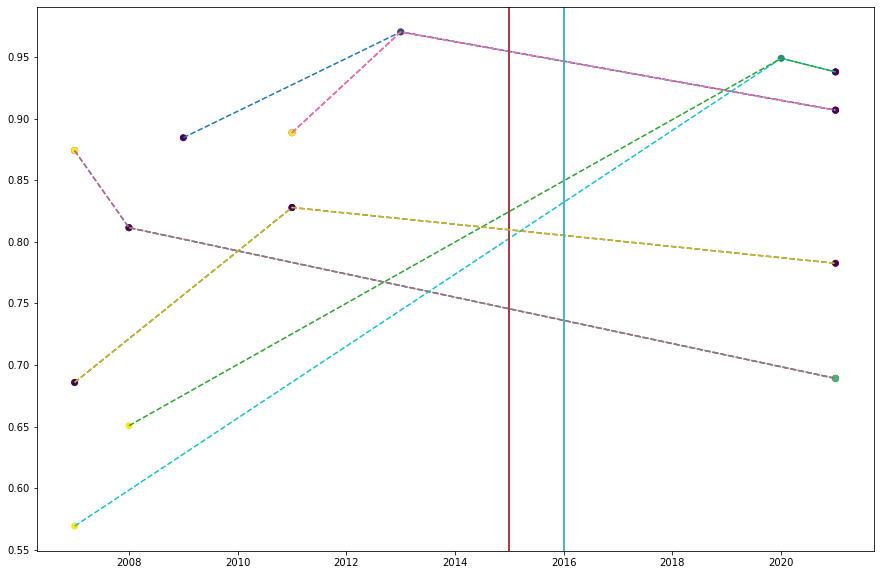

In [3]:
d = pd.read_csv("offset_prediction.csv")
plt.figure(figsize=(15, 10))
print(d.dtypes)
#d = d.drop(['pmid','year','exemplar_cl',], axis =1 )
colour=['blue','green','red','orange','cyan','black','pink','magenta','skyblue','brown']
#colors = np.random.rand(N, N)
#d = d[d['approval_year'] == 2014]
d = d.head(100)
d = d.head(10)
i = 0
palette = itertools.cycle(sns.color_palette())
for ind in d.index:
    x = [d['year_from_prize_earliest'][ind], d['exemplar_year'][ind],d['year_from_prize_latest'][ind]]
    y = [d['earlier_pred'][ind],d['exemplar_pred'][ind],d['later_pred'][ind]]
    plt.scatter(x, y, c = next(palette))
    plt.plot(x, y, c= next(palette),linestyle='dashed')
    plt.axvline(x = d['approval_year'][ind], color = next(palette), label = 'axvline - full height')
    
    #print(d['approval_year'][ind])
    i += 1

pmid                          int64
year                        float64
exemplar_year                 int64
exemplar_cl                   int64
approval_year               float64
drug_name                    object
prize_year                  float64
year_from_prize_earliest      int64
prize_cluster_earliest        int64
year_from_prize_latest        int64
prize_cluster_latest          int64
exemplar_pred               float64
earlier_pred                float64
later_pred                  float64
dtype: object


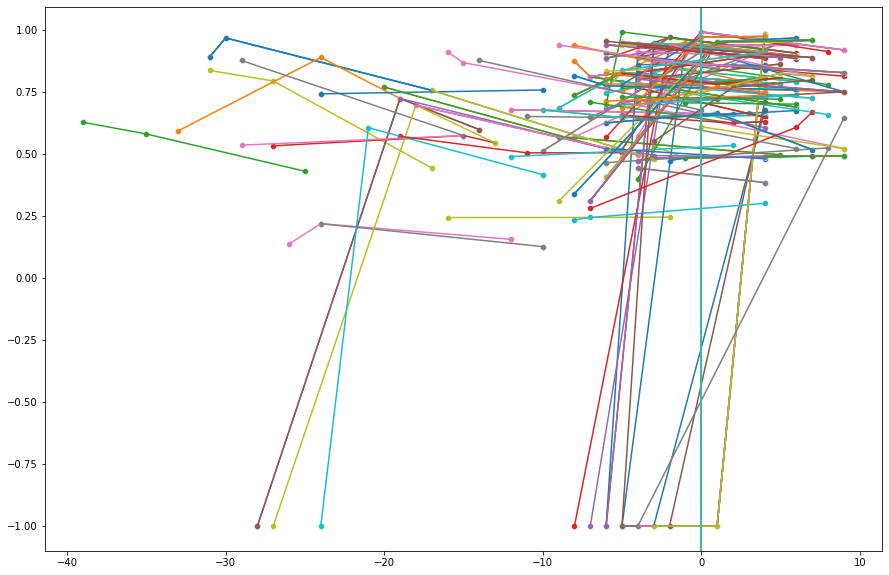

In [30]:
d = pd.read_csv("offset_prediction.csv")
plt.figure(figsize=(15, 10))
print(d.dtypes)
#d = d.drop(['pmid','year','exemplar_cl',], axis =1 )
colour=['blue','green','red','orange','cyan','black','pink','magenta','skyblue','brown']
#colors = np.random.rand(N, N)
#d = d[d['approval_year'] == 2014]
#d = d.head(100)
d = d.head(200)
palette = itertools.cycle(sns.color_palette())
i = 0
d['year_from_prize_earliest'] = d['year_from_prize_earliest'] - d['approval_year']
d['year_from_prize_latest'] = d['year_from_prize_latest'] - d['approval_year']
d['exemplar_year'] = d['exemplar_year'] - d['approval_year']
d['approval_year'] = 0
#print(d)
for ind in d.index:
    x = [d['year_from_prize_earliest'][ind], d['exemplar_year'][ind],d['year_from_prize_latest'][ind]]
    y = [d['earlier_pred'][ind],d['exemplar_pred'][ind],d['later_pred'][ind]]
    #plt.scatter(x, y, c = colour[i])
    #plt.plot(x, y, c= colour[i])
    c = next(palette)
    sns.scatterplot(x=x, y=y, sizes=(50,500), legend=False, color=c)
    sns.lineplot(x=x, y=y,estimator='max', color=c)
    plt.axvline(x = d['approval_year'][ind], color = c)
    
    #print(d['approval_year'][ind])
    #i += 1

pmid                          int64
year                        float64
exemplar_year                 int64
exemplar_cl                   int64
approval_year               float64
drug_name                    object
prize_year                  float64
year_from_prize_earliest      int64
prize_cluster_earliest        int64
year_from_prize_latest        int64
prize_cluster_latest          int64
exemplar_pred               float64
earlier_pred                float64
later_pred                  float64
dtype: object
214


/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/ana

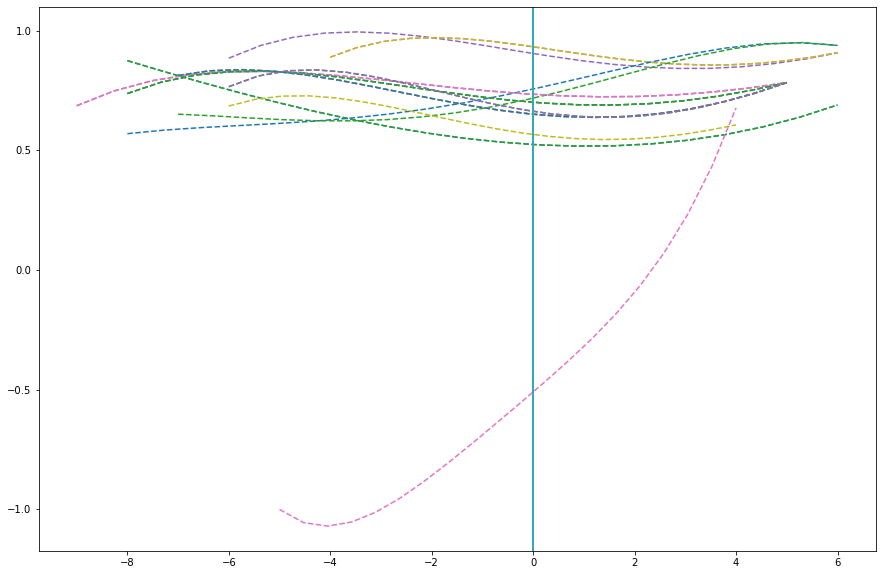

In [10]:
d = pd.read_csv("offset_prediction.csv")
plt.figure(figsize=(15, 10))
print(d.dtypes)
#d = d.drop(['pmid','year','exemplar_cl',], axis =1 )
colour=['blue','green','red','orange','cyan','black','pink','magenta','skyblue','brown']
#colors = np.random.rand(N, N)
#d = d[d['approval_year'] == 2014]
#d = d.head(100)

d = d[d['year_from_prize_earliest'] != d['exemplar_year']]
d = d[d['year_from_prize_latest'] != d['exemplar_year']]
print(len(d))
#d = d.sample(n=20,replace=False)
d = d.head(20)
i = 0
d['year_from_prize_earliest'] = d['year_from_prize_earliest'] - d['approval_year']
d['year_from_prize_latest'] = d['year_from_prize_latest'] - d['approval_year']
d['exemplar_year'] = d['exemplar_year'] - d['approval_year']
d['approval_year'] = 0
#print(d)

'''def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y'''
palette = itertools.cycle(sns.color_palette())
a = min(d['year_from_prize_earliest'].min(),d['year_from_prize_latest'].min(), d['exemplar_year'].min())
b = max(d['year_from_prize_earliest'].max(),d['year_from_prize_latest'].max(), d['exemplar_year'].max())
for ind in d.index:
    x = [d['year_from_prize_earliest'][ind], d['exemplar_year'][ind],d['year_from_prize_latest'][ind]]
    y = [d['earlier_pred'][ind],d['exemplar_pred'][ind],d['later_pred'][ind]]
    #plt.scatter(x, y, c = colour[i])
    #plt.plot(x, y, c= colour[i])
    
    #sns.scatterplot(x=x, y=y, sizes=(50,500), legend=False, color=colour[i])
    #sns.lineplot(x=x, y=y,estimator='max', color=colour[i])
    
    
    a = min(x)
    b = max(x)
    
    model1 = np.poly1d(np.polyfit(x, y, 4))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color = colour[i])
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    
    '''x = np.asarray(x)
    y = np.asarray(y)
    
    parameters, covariance = curve_fit(Gauss, x, y)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_y = Gauss(x, fit_A, fit_B)
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, fit_y, '-', label='fit')
    plt.legend()'''
    
    
    plt.axvline(x = d['approval_year'][ind], color = next(palette))
    
    #print(d['approval_year'][ind])
    #i += 1

25


/tmp/ipykernel_13683/2028308631.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2028308631.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2028308631.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2028308631.py:34: SettingWithCopyWarning: 
A value is trying to be set on a cop

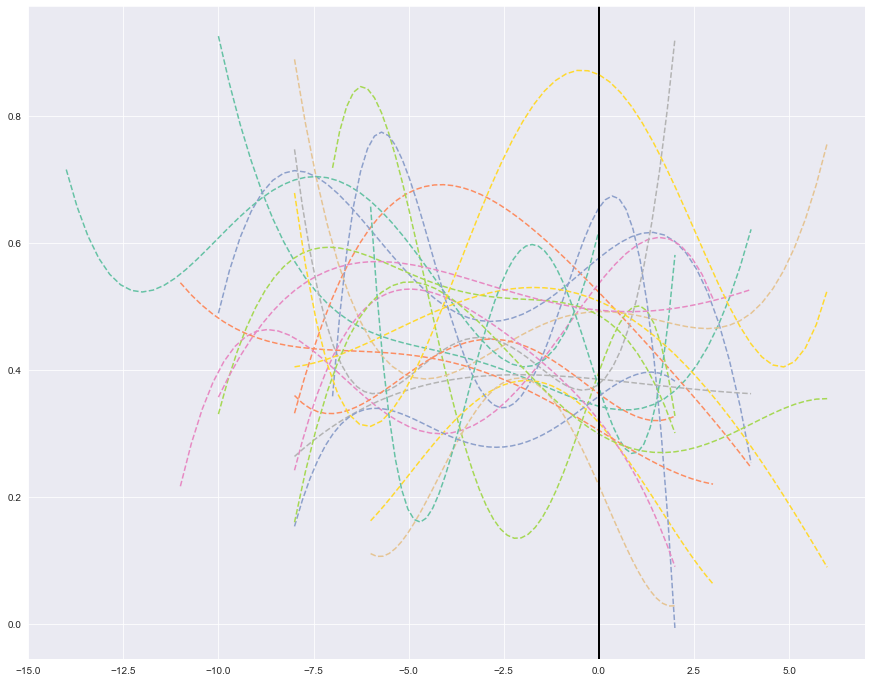

In [22]:
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_prediction.csv")
d = d.head(100)
#print(len(d))
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))

#print(d.dtypes)
palette = itertools.cycle(sns.color_palette())


alpha = 0.6
s = "*"
for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    
    y = d['pp'][ind]
    y = convert(y)
    
    
    x = [a - d['approval_year'][ind] for a in x]
        #x[i] = x[i] - d['approval_year'][ind]

    d['approval_year'][ind] = 0

    '''xx,yy = [],[]
    for i in range(0,len(x)):
        if x[i] >= -7.5 and x[i] <= 3.5:
            xx.append(x[i])
            yy.append(y[i])
            i+= 1
    x = xx
    y = yy
    if len(x) == 0:
        continue'''

    
    
    a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue
        
    #plt.scatter(x, y, c = next(palette))
    #plt.plot(x, y, c= next(palette),linestyle='dashed')
        
    
    model1 = np.poly1d(np.polyfit(x, y, 4))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 50)
    #plt.scatter(x, y, color=next(palette))
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    
    
    '''x = np.asarray(x)
    y = np.asarray(y)
    
    parameters, covariance = curve_fit(Gauss, x, y)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_y = Gauss(x, fit_A, fit_B)
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, fit_y, '-', label='fit')
    plt.legend()'''
    
    
    plt.axvline(x = d['approval_year'][ind], color = "black")
    #plt.axhline(y = 0.60, color = "red")
    
    #print(d['approval_year'][ind])
    #i += 1

15


/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0


Algorithm didn't converge. No fit to plot.


/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a cop

Algorithm didn't converge. No fit to plot.


/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a cop

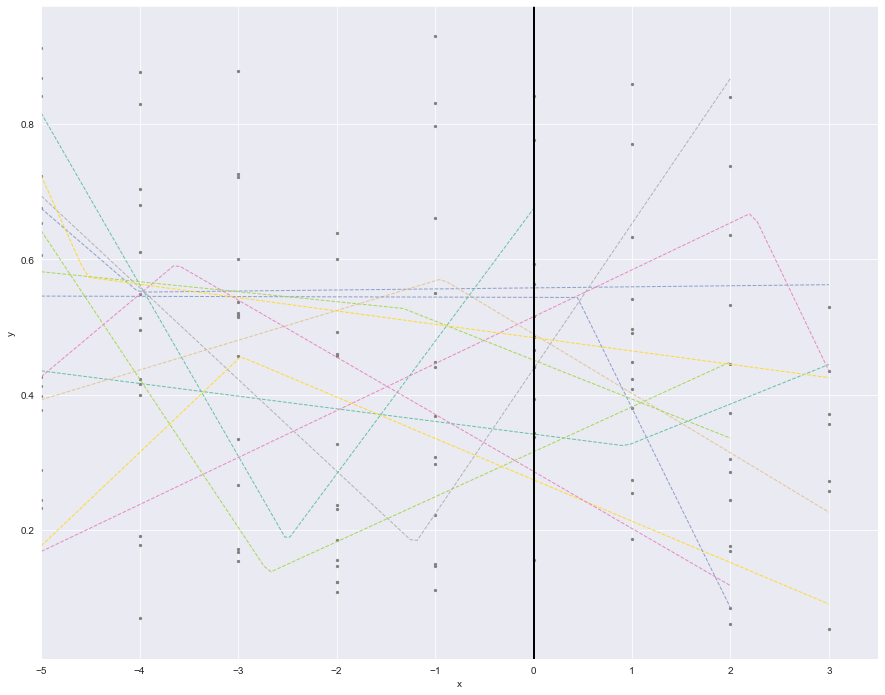

In [8]:
#piecewise linear regression plot in python
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_prediction.csv")
d = d.head(50)
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))
palette = itertools.cycle(sns.color_palette())

for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    y = d['pp'][ind]
    y = convert(y)
    x = [a - d['approval_year'][ind] for a in x]
    d['approval_year'][ind] = 0

    xx,yy = [],[]
    for i in range(0,len(x)):
        if x[i] >= -5 and x[i] <= 3.5:
            xx.append(x[i])
            yy.append(y[i])
            i+= 1
    x = xx
    y = yy
    if len(x) == 0:
        continue
    
    a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue

    breakpoint_1 = 0
    pw_fit = piecewise_regression.Fit(x, y, n_breakpoints= 1)
    #pw_fit.summary()
    #pw_fit.plot()
    
    pw_fit.plot_data(color="grey", s=5)
    # Pass in standard matplotlib keywords to control any of the plots
    pw_fit.plot_fit(color=next(palette), linewidth=1,linestyle = "--")
    #pw_fit.plot_breakpoints()
    #pw_fit.plot_breakpoint_confidence_intervals()
    plt.xlim([-5,3.5])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axvline(x = d['approval_year'][ind], color = "black")
    #plt.show()
    #plt.close()
    

    
    '''model1 = np.poly1d(np.polyfit(x, y, 3))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color=next(palette))
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    

    plt.axvline(x = d['approval_year'][ind], color = "black")
    plt.axhline(y = 0.60, color = "red")'''
    


25


/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0


Algorithm didn't converge. No fit to plot.


/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Algorithm didn't converge. No fit to plot.


/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0


Algorithm didn't converge. No fit to plot.


/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/345336040.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0


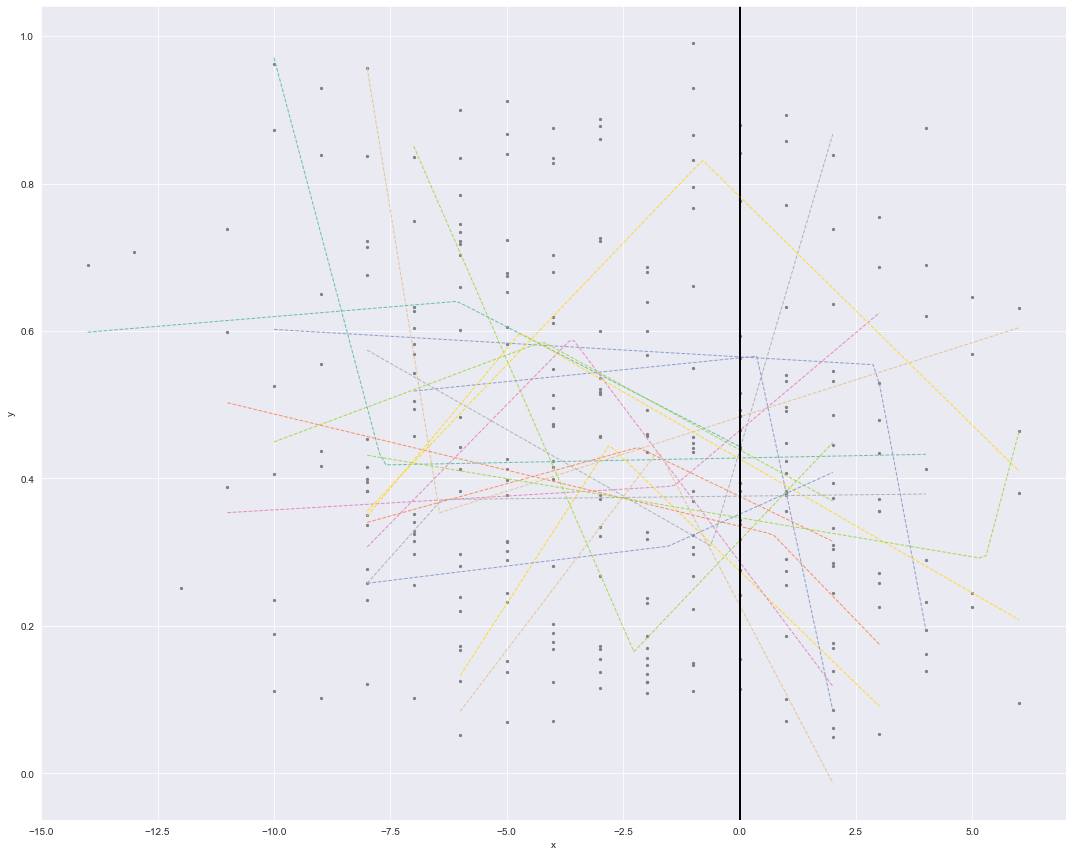

In [21]:
#piecewise linear regression plot in python
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_prediction.csv")
d = d.head(100)
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))
palette = itertools.cycle(sns.color_palette())

for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    y = d['pp'][ind]
    y = convert(y)
    #tot = np.sum(y)
    #y = [a/tot for a in y]
    x = [a - d['approval_year'][ind] for a in x]
    d['approval_year'][ind] = 0
    '''bef = 0
    for i in range(0,len(x)):
        if y[i] == max(y) and x[i] <= 0:
            bef = 1
            break
        if x[i] > 0:
            break
        i += 1
    if bef == 0:
        continue'''
      
    
    
    a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue

        
    breakpoint_1 = 0
    pw_fit = piecewise_regression.Fit(x, y, n_breakpoints= 1)
    #pw_fit.summary()
    #pw_fit.plot()
    
    pw_fit.plot_data(color="grey", s=5)
    # Pass in standard matplotlib keywords to control any of the plots
    pw_fit.plot_fit(color=next(palette), linewidth=1,linestyle = "--")
    #pw_fit.plot_breakpoints()
    #pw_fit.plot_breakpoint_confidence_intervals()
    #plt.xlim([-8,4])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axvline(x = d['approval_year'][ind], color = "black")
    #plt.show()
    #plt.close()
    

    
    '''model1 = np.poly1d(np.polyfit(x, y, 3))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color=next(palette))
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    

    plt.axvline(x = d['approval_year'][ind], color = "black")'''
    #plt.ylim([0.15,0.90])
    #plt.xlim([-8,3])
    #plt.axhline(y = 0.60, color = "red")
    
plt.tight_layout()

100


/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a cop


Intel MKL ERROR: Parameter 4 was incorrect on entry to DGELSD.


/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_13683/3237650432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a cop

LinAlgError: SVD did not converge in Linear Least Squares

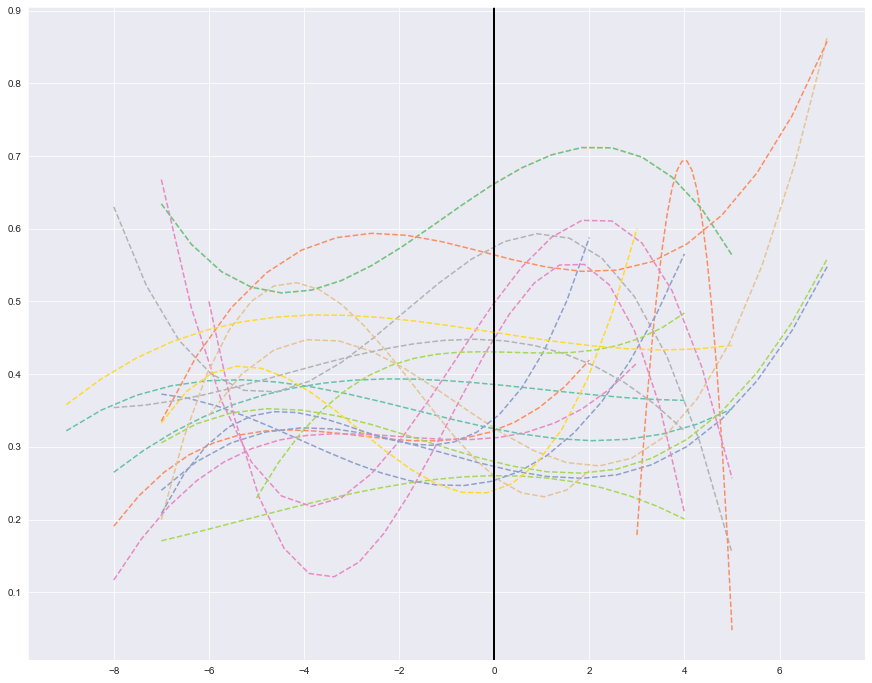

In [18]:
#piecewise linear regression plot in python
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_prediction.csv")
#d = d.head(300)
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))
palette = itertools.cycle(sns.color_palette())

for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    y = d['pp'][ind]
    y = convert(y)
    x = [a - d['approval_year'][ind] for a in x]
    d['approval_year'][ind] = 0
    #tot = np.sum(y)
    #y = [a/tot for a in y]
    bef = 0
    for i in range(0,len(x)):
        if y[i] == max(y) and x[i] <= 0:
            bef = 1
            break
        if x[i] > 0:
            break
        i += 1
    if bef == 1:
        continue
        
    
    
    a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue

        
    
        
    '''breakpoint_1 = 0
    pw_fit = piecewise_regression.Fit(x, y, n_breakpoints= 1)
    #pw_fit.summary()
    #pw_fit.plot()
    
    pw_fit.plot_data(color="grey", s=5)
    # Pass in standard matplotlib keywords to control any of the plots
    pw_fit.plot_fit(color=next(palette), linewidth=1,linestyle = "--")
    #pw_fit.plot_breakpoints()
    #pw_fit.plot_breakpoint_confidence_intervals()
    #plt.xlim([-5,3.5])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axvline(x = d['approval_year'][ind], color = "black")
    #plt.show()
    #plt.close()'''
    

    
    model1 = np.poly1d(np.polyfit(x, y, 3))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color=next(palette))
    c = next(palette)
    plt.plot(polyline, model1(polyline), "--",color=c)
    
    '''c = next(palette)
    sns.scatterplot(x=x, y=y, sizes=(50,500), legend=False, color=c)
    sns.lineplot(x=x, y=y,estimator='max', color=c)
    #plt.ylim([0.0,0.20])
    #plt.xlim([-20,10])'''
    

    plt.axvline(x = d['approval_year'][ind], color = "black")
    #plt.ylim([0.25,0.90])
    #plt.xlim([-15,8])
    #plt.axhline(y = 0.60, color = "red")
    
plt.tight_layout()